# HMM 02

**Markov Property

First, lets introduce a stocastic process or random process. A random process is a indexed set of random variables. In math, there are a lot of rabbit holes we can go into involving stochastic processes for now, we will consider one specific type stochastic process, the markov process. What makes a Markov process is a stochastic process that has the Markov property. A stochastic process has this Markov property if the conditional probability distribution of the next steps of the process only rely on the current step. In other words, the past steps are not involved so if you look it up enough you will see the word memoryless everywhere because the reliance only on the current step and not the past steps.

**Hidden Markov Model

Now, a Markov Model is a stochastic state space model involving random transitions between states where the probability of the jump is only dependent upon the current state, rather than any of the previous states. These states for example in our area of interest would be bear, bull and sideways markets. What makes a hidden markov model is that the probabilities between the states and the underlying states themselves. Other markov models have know some or all of these underlying states. So that what’s it hiding, the sauce. Keeping with our previous example the market tends to be up down or sideways market so this model will make these markets states with probabilities of staying in the current state and jumping to different states. Each of which have their own probabilities for staying and jumping to another state.

In [1]:
import yfinance as yf
from datetime import date
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [44]:
stonks = ['FCL.NS']
df = yf.download(stonks)

[*********************100%%**********************]  1 of 1 completed


In [45]:
df['Log'] = np.log(df['Close'])
df['Returns'] = df['Log'].pct_change()
df['Range'] = (df['High'] / df['Low']) - 1
df.dropna(inplace=True)
data = df[['Returns', 'Range']]

In [46]:
model = hmm.GaussianHMM(n_components=3, covariance_type='full')
model.fit(data)

GaussianHMM(covariance_type='full', n_components=3)

In [47]:
model.score(data)

12740.624385848365

In [48]:
states = model.predict(data)

<Axes: >

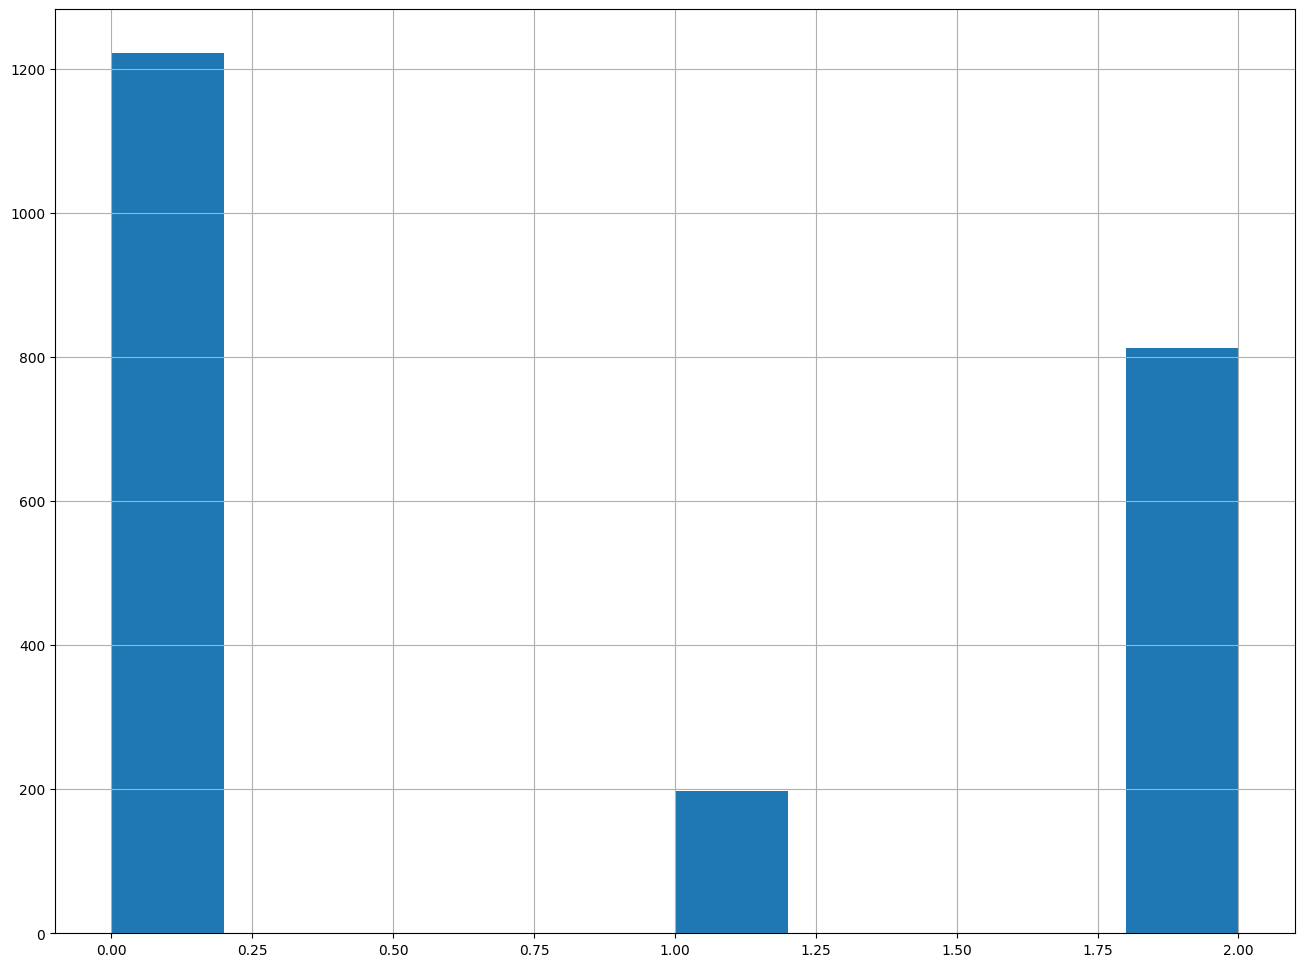

In [49]:
pd.Series(states).hist()

/tmp/ipykernel_28699/1076325870.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state3.append(df['Close'][i])
/tmp/ipykernel_28699/1076325870.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state1.append(df['Close'][i])
/tmp/ipykernel_28699/1076325870.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state2.append(df['Close'][i])


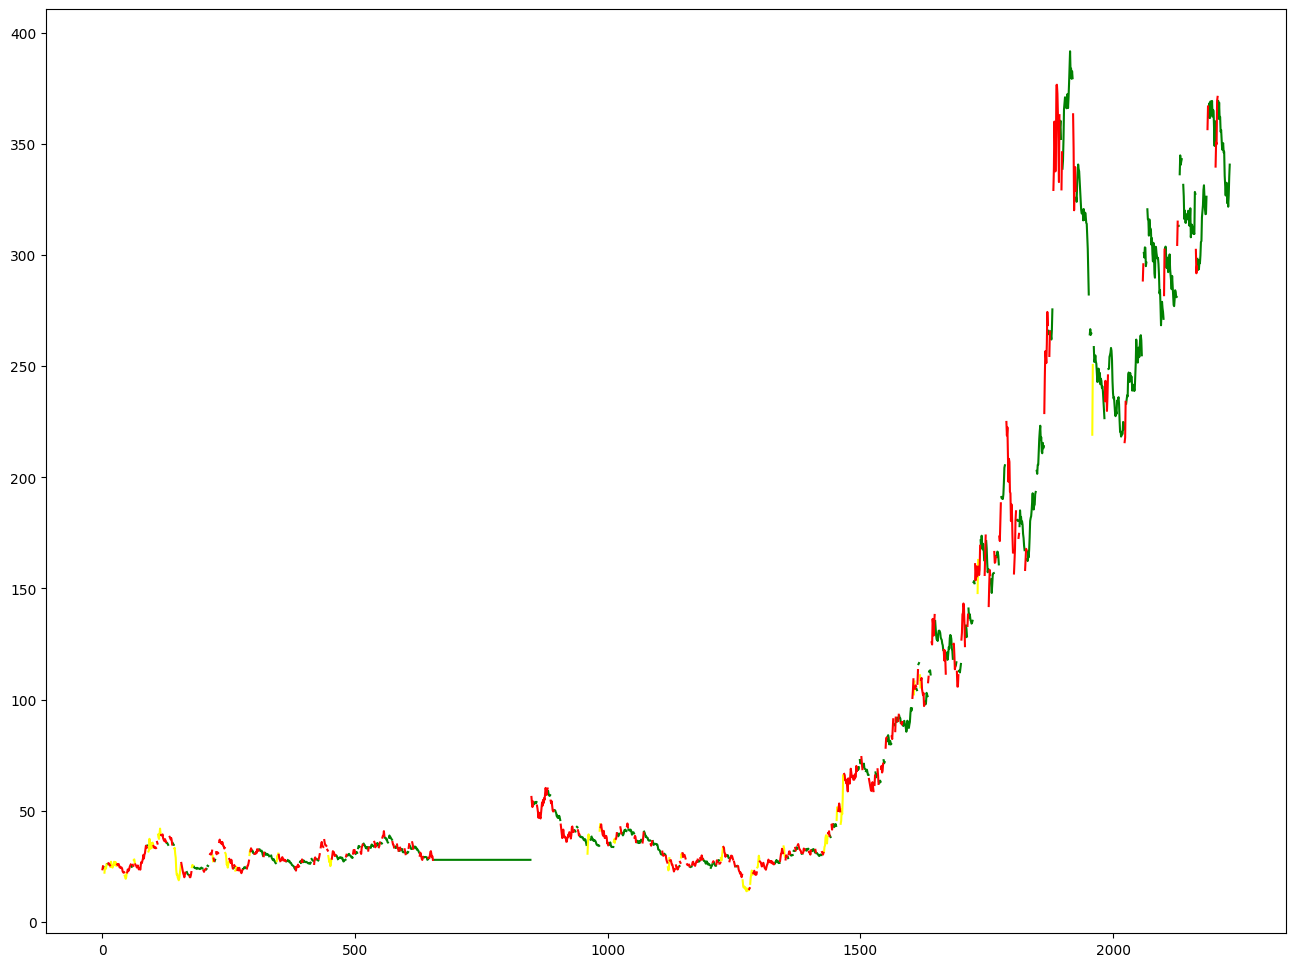

In [50]:
state1,state2,state3 = [],[],[]
i = 0
for state in states:
  if state == 0:
    state1.append(df['Close'][i])
    state2.append(float('nan'))
    state3.append(float('nan'))
  if state == 1:
    state2.append(df['Close'][i])
    state1.append(float('nan'))
    state3.append(float('nan'))
  if state == 2:
    state3.append(df['Close'][i])
    state2.append(float('nan'))
    state1.append(float('nan'))
  i += 1
plt.plot(state1,color='green')
plt.plot(state2,color='yellow')
plt.plot(state3,color='red')

### The states have been color coated to show which prices fall into which market. Green being bull would look correct, yellow being sideways and red being bear.